# EDA Notebook
This notebook contains some of the postprocessing data visualizations I created to better understand the estimated fire areas. <br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import plotly.graph_objects as go
import plotly.express as px

from statsmodels.nonparametric.smoothers_lowess import lowess

from statsmodels.graphics.tsaplots import plot_pacf

### Summary of Region DataFrame
Iterating over the 7 regions of Australia to print consecutive plots for EDA. <br>
- line plot of estimated fire area with a local weighted regression line (lowess frac = 1/50) <br>
- subplots of the independent variables: <br>
"""<br>
'Estimated_fire_area', 'Count', 'mean_Precipitation', 
'mean_RelativeHumidity', 'mean_SoilWaterContent',
'mean_SolarRadiation', 'mean_Temperature', 'mean_WindSpeed',
'Vegetation_index_mean'<br>  """<br>
- correlation plot with independent variables and estimated_fire_area (t + 1)<br>
- correlation heatmap
- pacf plot

In [4]:
regions = ['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA']

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- QL ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


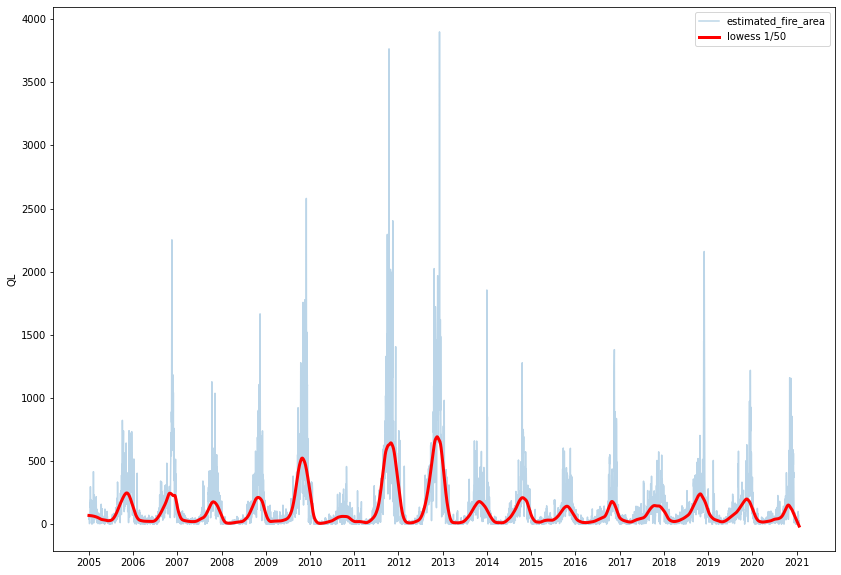

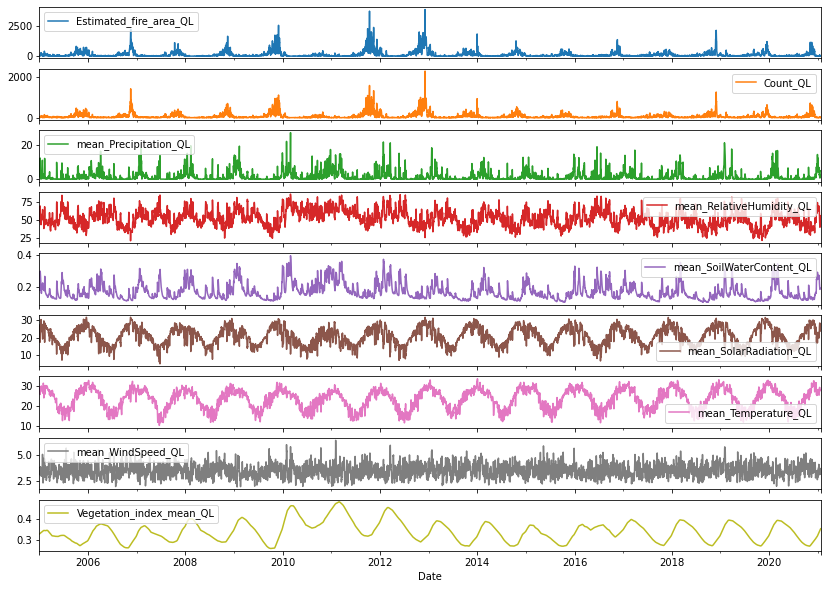

------------------------------------------------------------------------------------------------------------------------


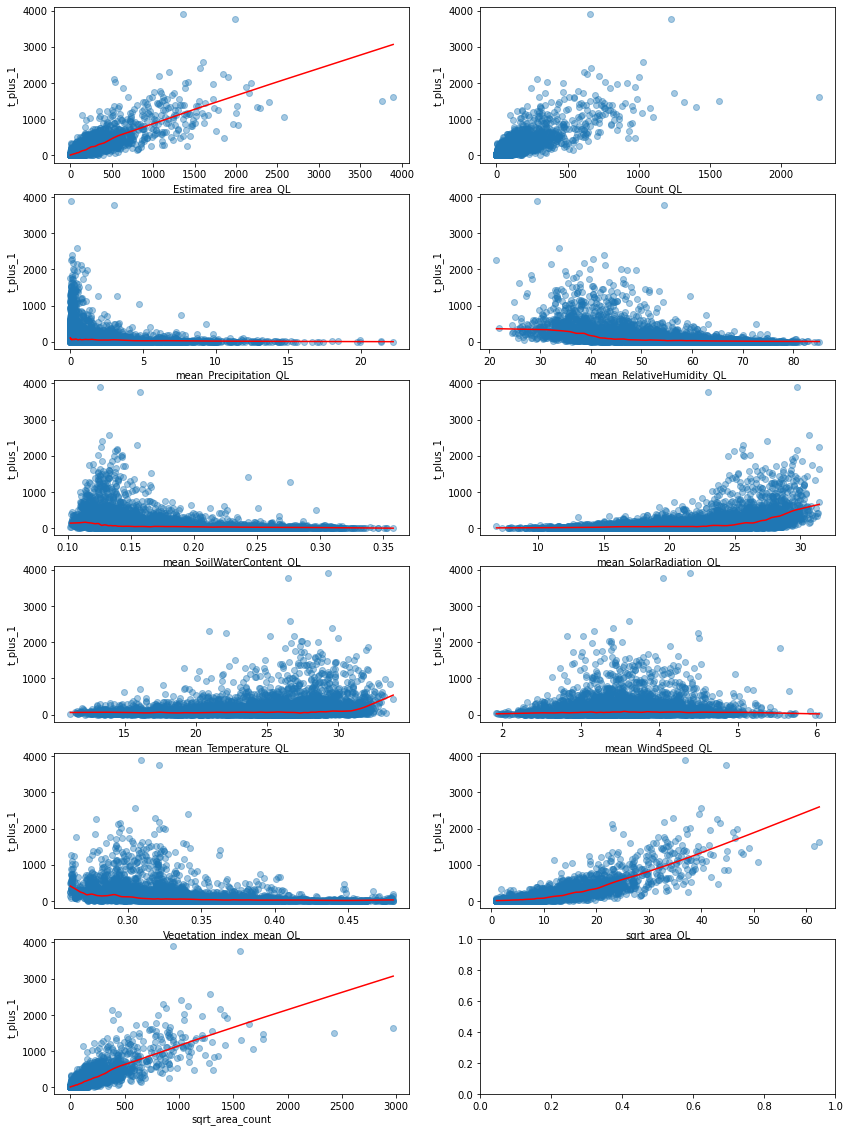

------------------------------------------------------------------------------------------------------------------------


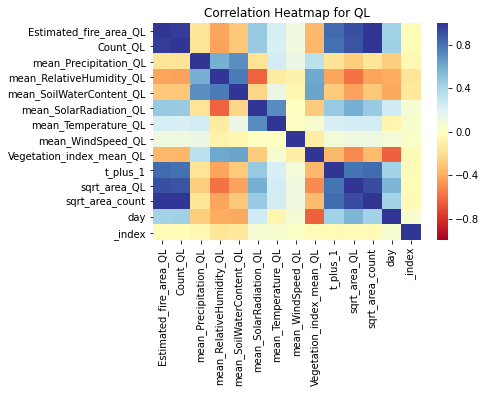

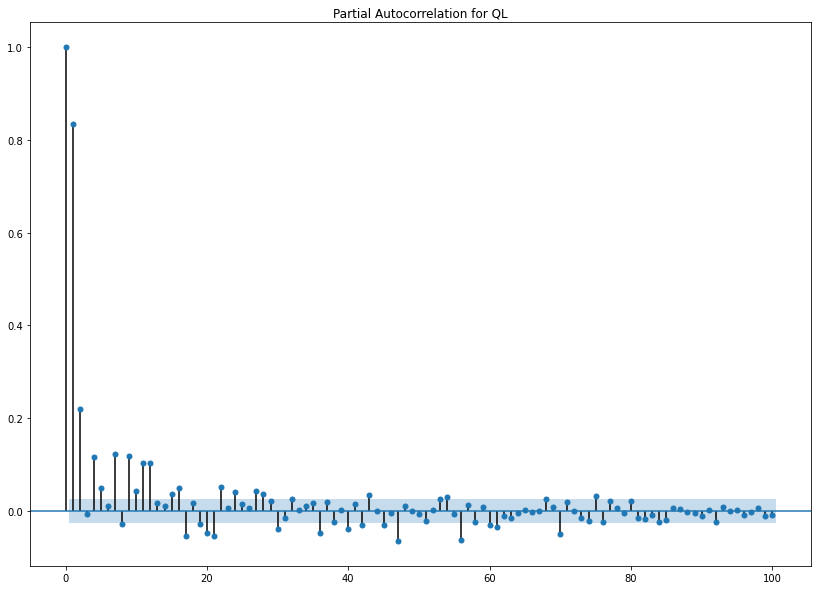

In [15]:
for each in regions:
    print('----' * 30)
    print('----' * 10, each, '----' * 19)
    print('----' * 30)
    
    # Pre-processing the dataframes and filling missing values at January 2021
    df = pd.read_csv('data_regions/{}_iso.csv'.format(each))
    df['Date'] = pd.to_datetime(df['Date'])
    for x in df.columns:
        df[x] = df[x].fillna(method='ffill')
    df.set_index('Date', inplace=True)
    
    
    # t_plus_1 is the dependant and will plot correlation between variables
    df['t_plus_1'] = df['Estimated_fire_area_{}'.format(each)].shift(-1)
    
    # Feature engineering by assuming certain characteristics of the fire
    df['sqrt_area_{}'.format(each)] = np.sqrt(df['Estimated_fire_area_{}'.format(each)])
    df['sqrt_area_count'] = np.sqrt(df['Estimated_fire_area_{}'.format(each)] / df['Count_{}'.format(each)]) * df['Count_{}'.format(each)]
    columns = df.columns.drop('t_plus_1')

    
    # ^^^^^ START OF LINE PLOT ^^^^^
    df['day'] = df.index.dayofyear
    df['_index'] = range(len(df))
    
    # fitting a lowess line
    yhat = lowess(df['Estimated_fire_area_{}'.format(each)], df['_index'], frac = 1/50)

    
    plt.figure(figsize=(14,10))
    plt.plot(df['_index'], df['Estimated_fire_area_{}'.format(each)], alpha = 0.3, label = 'estimated_fire_area')
    plt.plot(yhat.T[0], yhat.T[1], color = 'r', label = 'lowess 1/50', linewidth = 3)
    plt.xticks(df.loc[df['day'].eq(1)]['_index'].values,
              labels = df.loc[df['day'].eq(1)].index.year)
    plt.legend(loc='upper right')
    plt.ylabel(each)
    
    plt.show()
    # ----- END OF LINE PLOT -----
    
    
    
    
    # ^^^^^ START OF SUBPLOTS ^^^^^
    # indexing columns up to 9
    """
    ['Estimated_fire_area_QL', 'Count_QL', 'mean_Precipitation_QL',
       'mean_RelativeHumidity_QL', 'mean_SoilWaterContent_QL',
       'mean_SolarRadiation_QL', 'mean_Temperature_QL', 'mean_WindSpeed_QL',
       'Vegetation_index_mean_QL']
    """
    df.iloc[:, :9].plot(subplots = True, figsize=(14,10))
    plt.show()
    # ----- END OF SUBPLOTS -----
    
    
    print('----' * 30)
    
    
    
    # ^^^^^ START OF CORRELATION SUBPLOTS ^^^^^
    fig, ax = plt.subplots(nrows = 6, ncols = 2, figsize = (14,20))
    for i, x in enumerate(columns):

        
        yhat = lowess(df.dropna()['t_plus_1'], df.dropna()[x], frac = 1/20)
        ax[i//2][i%2].plot(yhat.T[0], yhat.T[1], color = 'r')
        ax[i//2][i%2].scatter(df.dropna()[x], df.dropna()['t_plus_1'], alpha = 0.4)
        ax[i//2][i%2].set_xlabel(x)
        ax[i//2][i%2].set_ylabel('t_plus_1')

    plt.show()
    # ----- END OF CORRELATION PLOT -----
    
    print('----' * 30)
    
    
    # ^^^^^ START OF CORRELATION HEATMAP ^^^^^
    corr = df.corr()

    sns.heatmap(corr, cmap = 'RdYlBu', vmin = -1, vmax = 1)
    plt.title('Correlation Heatmap for {}'.format(each))
    plt.show()
    # ----- END OF CORRELATION HEATMAP -----
    
    
    # ^^^^^ START OF PACF ^^^^^
    fig, ax = plt.subplots(figsize=(14,10))
    plot_pacf(df['Estimated_fire_area_{}'.format(each)], lags = 100, ax = ax)

    ax.set_title('Partial Autocorrelation for {}'.format(each))
    plt.show();
    # ----- END OF PACF -----
    

### Estimated fire area in log scale
The same visualizations as above, but I transform the dependant variable, estimated_fire_area, to log scale (x+ 1)

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- QL ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


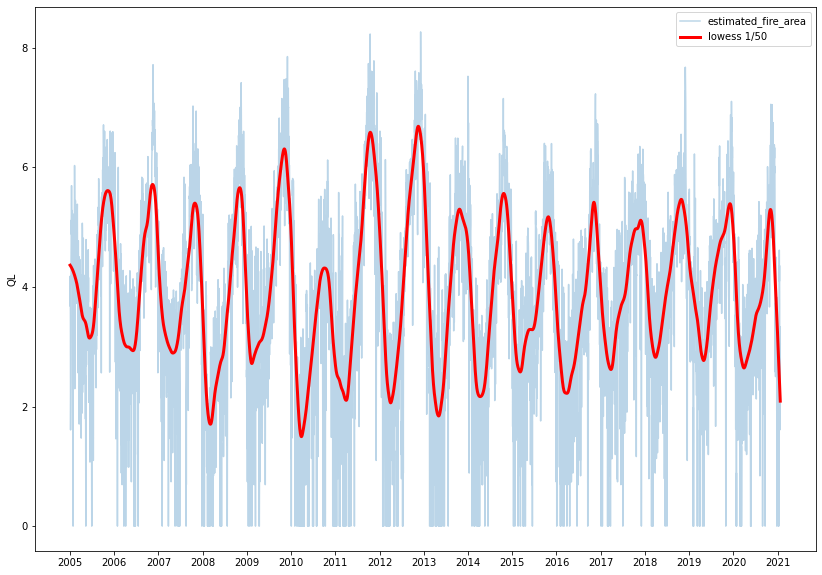

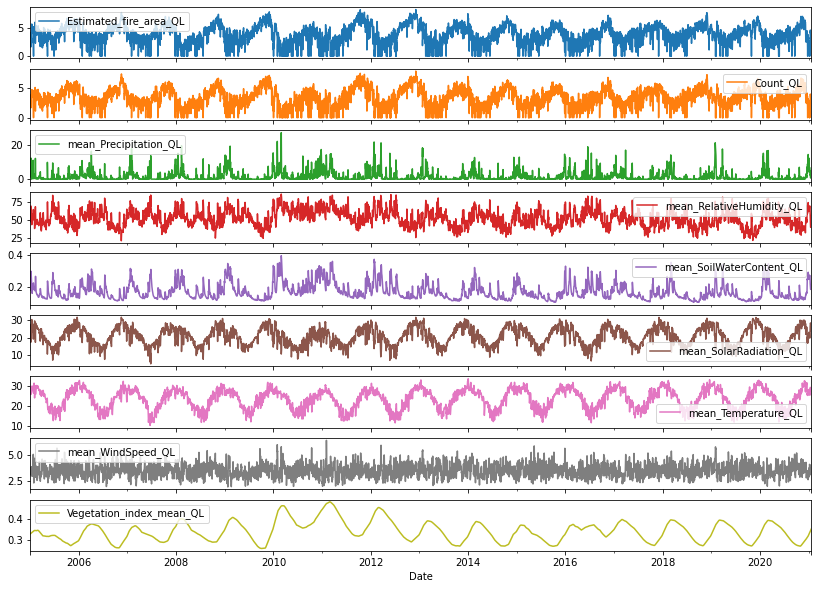

------------------------------------------------------------------------------------------------------------------------


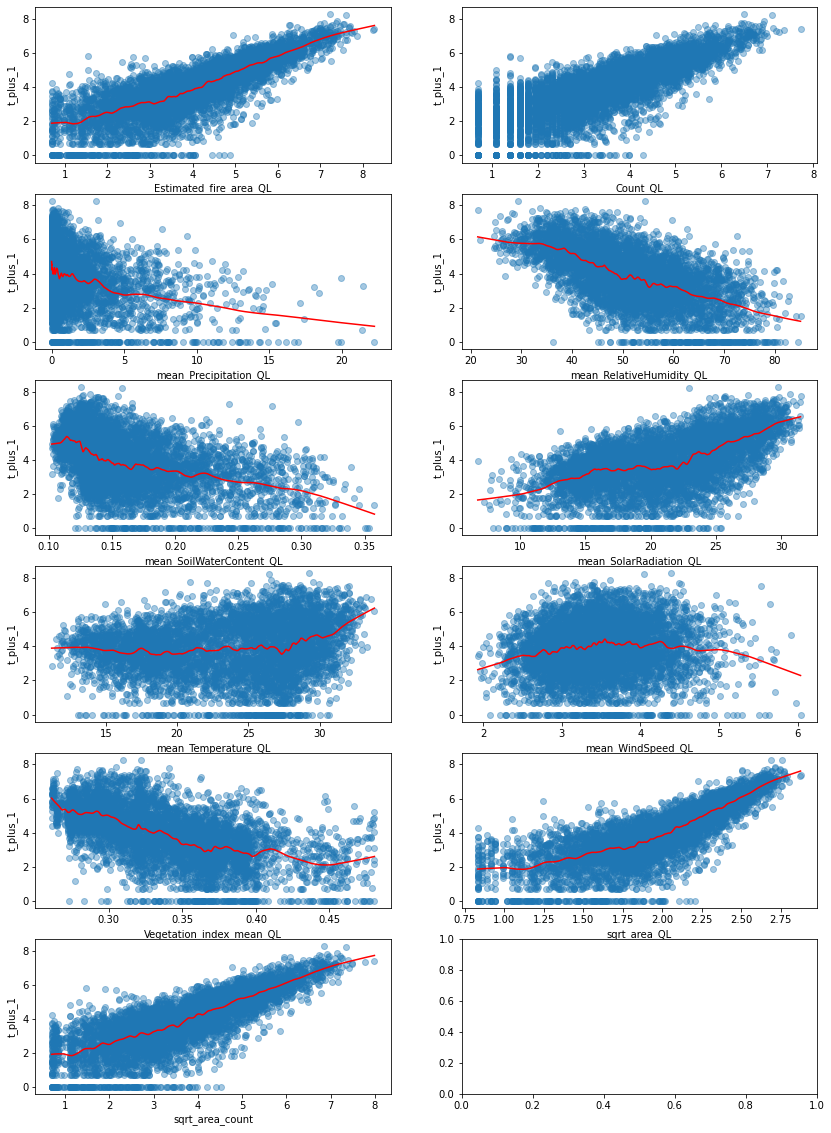

------------------------------------------------------------------------------------------------------------------------


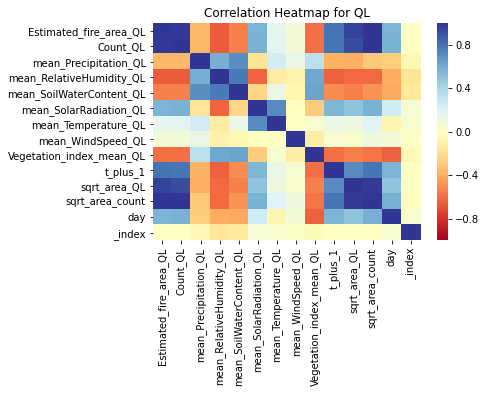

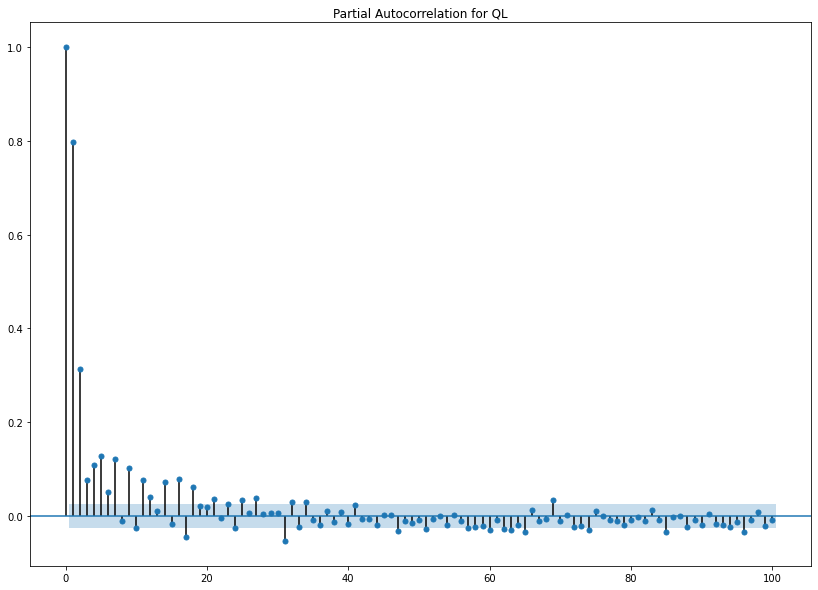

In [16]:
for each in regions:
    print('----' * 30)
    print('----' * 10, each, '----' * 19)
    print('----' * 30)
    
    # Pre-processing the dataframes and filling missing values at January 2021
    df = pd.read_csv('data_regions/{}_iso.csv'.format(each))
    df['Date'] = pd.to_datetime(df['Date'])
    for x in df.columns:
        df[x] = df[x].fillna(method='ffill')
    df.set_index('Date', inplace=True)
    
    # plot for estimated fire areas and count in log(x+1) scale
    df['Estimated_fire_area_{}'.format(each)] = np.log1p(df['Estimated_fire_area_{}'.format(each)])
    df['Count_{}'.format(each)] = np.log1p(df['Count_{}'.format(each)])
    
    # t_plus_1 is the dependant and will plot correlation between variables
    df['t_plus_1'] = df['Estimated_fire_area_{}'.format(each)].shift(-1)
    
    # Feature engineering by assuming certain characteristics of the fire
    df['sqrt_area_{}'.format(each)] = np.sqrt(df['Estimated_fire_area_{}'.format(each)])
    df['sqrt_area_count'] = np.sqrt(df['Estimated_fire_area_{}'.format(each)] / df['Count_{}'.format(each)]) * df['Count_{}'.format(each)]
    columns = df.columns.drop('t_plus_1')

    
    # ^^^^^ START OF LINE PLOT ^^^^^
    df['day'] = df.index.dayofyear
    df['_index'] = range(len(df))
    
    # fitting a lowess line
    yhat = lowess(df['Estimated_fire_area_{}'.format(each)], df['_index'], frac = 1/50)

    
    plt.figure(figsize=(14,10))
    plt.plot(df['_index'], df['Estimated_fire_area_{}'.format(each)], alpha = 0.3, label = 'estimated_fire_area')
    plt.plot(yhat.T[0], yhat.T[1], color = 'r', label = 'lowess 1/50', linewidth = 3)
    plt.xticks(df.loc[df['day'].eq(1)]['_index'].values,
              labels = df.loc[df['day'].eq(1)].index.year)
    plt.legend(loc='upper right')
    plt.ylabel(each)
    
    plt.show()
    # ----- END OF LINE PLOT -----
    
    
    
    
    # ^^^^^ START OF SUBPLOTS ^^^^^
    # indexing columns up to 9
    """
    ['Estimated_fire_area_QL', 'Count_QL', 'mean_Precipitation_QL',
       'mean_RelativeHumidity_QL', 'mean_SoilWaterContent_QL',
       'mean_SolarRadiation_QL', 'mean_Temperature_QL', 'mean_WindSpeed_QL',
       'Vegetation_index_mean_QL']
    """
    df.iloc[:, :9].plot(subplots = True, figsize=(14,10))
    plt.show()
    # ----- END OF SUBPLOTS -----
    
    
    print('----' * 30)
    
    
    
    # ^^^^^ START OF CORRELATION SUBPLOTS ^^^^^
    fig, ax = plt.subplots(nrows = 6, ncols = 2, figsize = (14,20))
    for i, x in enumerate(columns):

        
        yhat = lowess(df.dropna()['t_plus_1'], df.dropna()[x], frac = 1/20)
        ax[i//2][i%2].plot(yhat.T[0], yhat.T[1], color = 'r')
        ax[i//2][i%2].scatter(df.dropna()[x], df.dropna()['t_plus_1'], alpha = 0.4)
        ax[i//2][i%2].set_xlabel(x)
        ax[i//2][i%2].set_ylabel('t_plus_1')

    plt.show()
    # ----- END OF CORRELATION PLOT -----
    
    print('----' * 30)
    
    
    # ^^^^^ START OF CORRELATION HEATMAP ^^^^^
    corr = df.corr()

    sns.heatmap(corr, cmap = 'RdYlBu', vmin = -1, vmax = 1)
    plt.title('Correlation Heatmap for {}'.format(each))
    plt.show()
    # ----- END OF CORRELATION HEATMAP -----
    
    
    # ^^^^^ START OF PACF ^^^^^
    fig, ax = plt.subplots(figsize=(14,10))
    plot_pacf(df['Estimated_fire_area_{}'.format(each)], lags = 100, ax = ax)

    ax.set_title('Partial Autocorrelation for {}'.format(each))
    plt.show();
    # ----- END OF PACF -----
    

### Plots for presentation
Creating separate plots to build story

In [113]:
regions = ['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA']
fire_regions = ['Estimated_fire_area_{}'.format(i) for i in regions]


merge_df = pd.DataFrame()
for i,x in zip(regions, fire_regions):
    df = pd.read_csv('{}_iso.csv'.format(i))
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', x]]
    df = pd.melt(df, id_vars = 'Date', value_vars = x)
    df['variable'] = df['variable'].replace(to_replace = x, value = i)
    merge_df = pd.concat([merge_df, df])
    merge_df.reset_index(drop=True, inplace=True)
    
merge_df.rename(columns = {'value':'Estimated_fire_area'}, inplace=True)


In [114]:
merge_df.dropna(inplace=True)
merge_df['month'] = merge_df['Date'].dt.month
merge_df['log1p_fire_area'] = np.log1p(merge_df['Estimated_fire_area'])
merge_df

,Date,variable,Estimated_fire_area,month,log1p_fire_area
0,2005-01-01,NSW,0.000000,1,0.000000
1,2005-01-02,NSW,0.000000,1,0.000000
2,2005-01-03,NSW,0.000000,1,0.000000
3,2005-01-04,NSW,8.680000,1,2.270062
4,2005-01-05,NSW,16.611250,1,2.868538
...,...,...,...,...,...
41050,2021-01-11,WA,9.660000,1,2.366498
41051,2021-01-12,WA,9.011429,1,2.303727
41052,2021-01-13,WA,11.555556,1,2.530163
41053,2021-01-14,WA,4.410000,1,1.688249


In [119]:
pivot_df = pd.pivot(merge_df, index = 'Date', columns = 'variable', values = 'Estimated_fire_area')

In [121]:
color_dict = {
    0: '#107508',
    1: '#e0b60d',
    2: '#6474cc',
    3: '#784dbf',
    4: '#7c818f',
    5: 'red',
    6: '#2cb0ae'
}

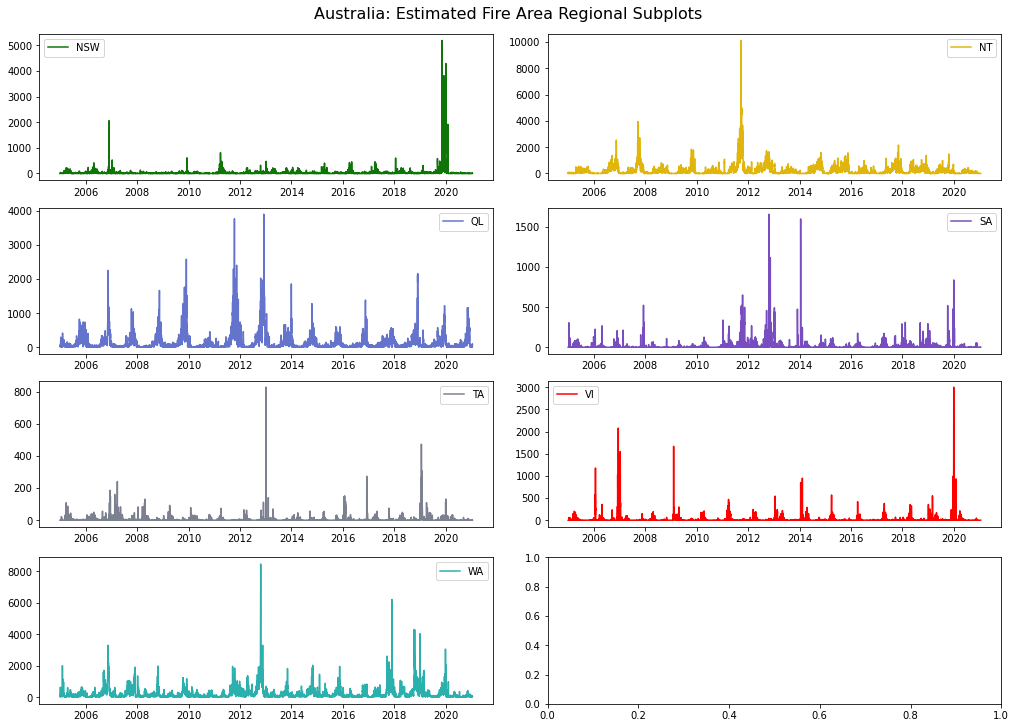

In [131]:
fig, ax = plt.subplots(figsize=(14,10), nrows = 4, ncols = 2, constrained_layout = True)
for i,x in enumerate(pivot_df.columns):
    ax[i//2][i%2].plot(pivot_df[x], label = x, color = color_dict[i])
    ax[i//2][i%2].legend()
fig.suptitle('Australia: Estimated Fire Area Regional Subplots', fontsize = 16)
fig.savefig('Images/EFA_subplots')

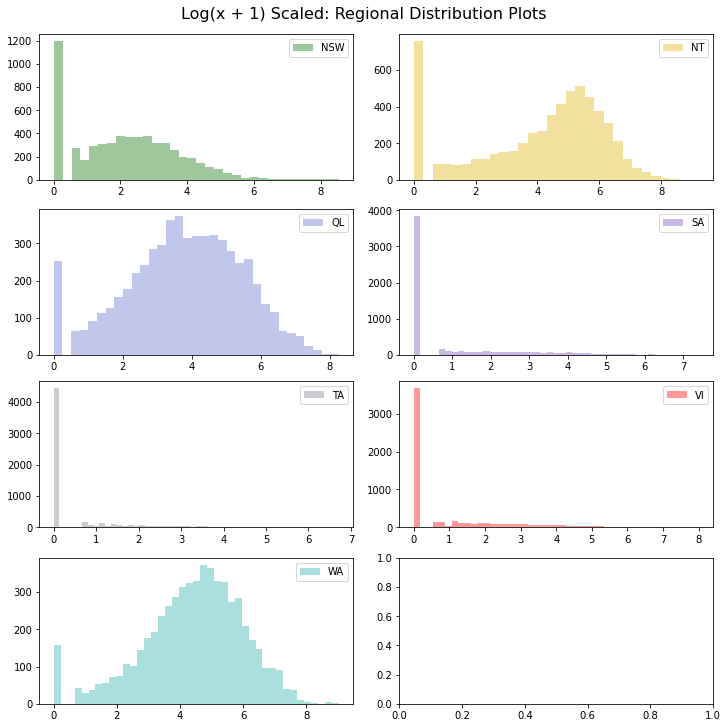

In [139]:
# log scale wildfires for a more normal looking distribution

fig, ax = plt.subplots(figsize=(10,10), nrows = 4, ncols = 2, constrained_layout = True)
for i,x in enumerate(pivot_df.columns):
    sns.distplot(np.log1p(pivot_df[x]), kde= False, ax = ax[i//2][i%2], color = color_dict[i], label = x)
    ax[i//2][i%2].set_xlabel('')
#     ax[i//2][i%2].set_title(x)
    ax[i//2][i%2].legend()
fig.suptitle('Log(x + 1) Scaled: Regional Distribution Plots', fontsize = 16)
fig.savefig('Images/EFA_distplots')

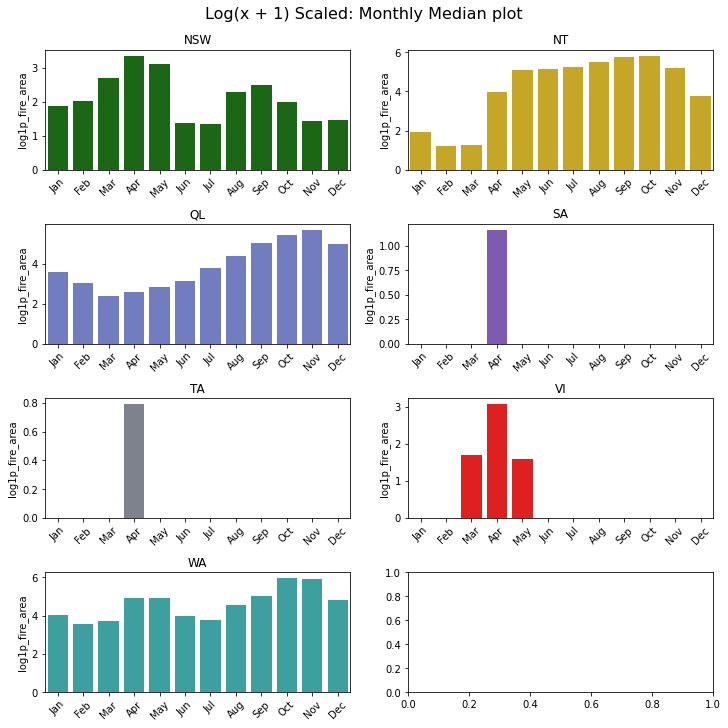

In [148]:
# sns.barplot(x = 'month', y = 'log1p_fire_area', data = merge_df.loc[merge_df['variable'].eq('NSW')], estimator = np.median, color = 'r')

fig, ax = plt.subplots(figsize=(10,10), nrows = 4, ncols = 2, constrained_layout = True)
for i,x in enumerate(pivot_df.columns):
    sns.barplot(x = 'month', y = 'log1p_fire_area', data = merge_df.loc[merge_df['variable'].eq(x)], estimator = np.median, color = color_dict[i], ax = ax[i//2][i%2], ci = None)
    ax[i//2][i%2].set_xlabel('')
    ax[i//2][i%2].set_title(x)
    ax[i//2][i%2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 45)
#     ax[i//2][i%2].legend()
fig.suptitle('Log(x + 1) Scaled: Monthly Median plot', fontsize = 16)
fig.savefig('Images/EFA_MonthlylogScaled')